# ¡Empezando con los cuantos!

Comencemos pensando en cómo pueden operar las computadoras cuánticas; primero pensamos en sistemas clásicos, con una mente binaria decimos "es" o "no es"; bueno, tal vez todos aquí también estén pensando eso, pero ¿qué dices si te dicen que puede haber una tercera condición, "es y luego no, pero puede ser de nuevo"!

Para hacer eso, tenemos que estudiar la primera condición, todo programa o sistema clásico que sea reversible (es decir, un programa clásico hecho solo por operadores reversibles) es también un programa cuántico. Dándonos la oportunidad de realizar programas con solo operador NOT.

# Nuestro primer circuito cuántico

A partir de ahora, marcamos cada programa con la siguiente línea debido a la importación de cada biblioteca para nuestro código:

desde qiskit importar QuantumRegister, ClassicalRegister, QuantumCircuit

In [15]:
# ---------------------------------------------------------------------
#   DEFINING QISKIT IN OUR CODE
#----------------------------------------------------------------------
#A quantum circuit is composed by quantum and classical bits in Qiskit.
# here are the objects that we use to create a quantum circuit in qiskit
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit

#----------------------------------------------------------------------
#   QUANTUM BIT REGISTER
#----------------------------------------------------------------------
# We want to use a register for know how many qbits are used in our circuit
q =  QuantumRegister(1,"qreg") # For the first parameter we use a single Qbit but it could be more
# the second parameter is optional but used for register a name to our Qbits

#----------------------------------------------------------------------
#   CLASSICAL BIT REGISTER
#----------------------------------------------------------------------
#Once we create a register for our circuit we must retrive the information they send
#For this work we will measure classically each Qbit in their own circuit
#     The measurement result is stored classically.
#     Therefore, we also use a classical regiser with classical bit(s)
c = ClassicalRegister(1,"creg") # The number of Classical Bits and Qbits must match
# As same as first, second parameter is optional, just for naming our Cbits

#----------------------------------------------------------------------
#   QUANTUM CIRCUIT
#----------------------------------------------------------------------
#With both of ours registers, its time create our circuit 
#As you migth see, declaration is simple, just remeber the order of the parameters
qc = QuantumCircuit(q,c)


Con esta parte del código ponemos a disposición el circuito con el que operar, hablando de operar, comencemos aplicando un operador NOT al circuito que acabamos de crear.

In [16]:
#----------------------------------------------------------------------
#   NOT OPERATOR
#----------------------------------------------------------------------
# Remember that opperators just apply on quantum bits, also can be named as "gates"
# we apply NOT operator represented as "x" in qiskit
# operator is a part of the circuit, and we should specify the quantum bit as its parameter
qc.x(q[0]) # (quantum) bits are enumerated starting from 0
# NOT operator or x-gate is applied to the first qubit of the quantum register
#Thus, each Quantum register can be interpreted as an array of Qbits

#----------------------------------------------------------------------
#   QUANTUM MEASURING AND CLASSICAL REGISTER
#----------------------------------------------------------------------
# measurement is defined by associating a Qbit to a Cbit
qc.measure(q[0],c[0])
# after the measurement, the observed value of the quantum bit is stored in the classical bit

# we run our codes until now, and then draw our circuit
print("The design of the circuit is done.") 

The design of the circuit is done.


# ¿Dónde está mi circuito? Visualiza el circuito

Poder observar es una cualidad que nos ayudará a encontrar errores y ver el comportamiento del circuito.

Podemos utilizar dos métodos, ambos nos muestran la misma información en el tiempo.

In [17]:
#------------------------------------------------------------------------
#  SIMPLE METHOD
#------------------------------------------------------------------------
#We can use a simple method by definiting the circuit in ASCII art
#This method is inside qiskit library
qc.draw()

#re-execute this cell if circuit is NOT displayed

┌───┐┌─┐
qreg_0: ┤ X ├┤M├
        └───┘└╥┘
creg: 1/══════╩═
              0

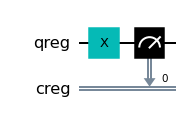

In [18]:
#------------------------------------------------------------------------
#  AESTHETIC METHOD
#------------------------------------------------------------------------
#We can use a more colorful and defined circuit with matplotlib
#Difference is just on the details showed
#We need the matplotlib library
#DECLARATION:
#        mycircuit.draw(output), default=ASCII output,'mpl' = Matplotlib output
qc.draw('mpl')

#re-execute this cell if circuit is NOT displayed, matplotlib library is not necesary

Ahora puede ver en nuestro diagrama que nuestro Qbit y Cbit comienza en 0.

Como convención en computación cuántica (o mecánica), el estado 0 se denota como $ \ ket {0} $. Esta notación se llama notación ket o de Dirac.

Cada bit cuántico se representa como una única línea recta. Cada bit clásico se representa como una línea recta doble. Como conexión por cable.

Preste atención a las casillas, son las medidas requeridas en el código como en el diagrama. Las puertas u operadores están representados por su letra mayúscula mientras que las medidas son las diminutas con una "M" en el interior. 

# ¡Arde bebe arde!
## Ejecutando el circuito

Hoy en día, podemos obtener acceso a una computación cuántica real mediante el uso de un simulador en la nube (como IBM Quantum Experience) o ingresando a una empresa que tenga uno utilizable (como Google), pero como solo podemos ejecutar un simple Código Python, comencemos usando un simulador local en una computadora normal.

In [19]:
#------------------------------------------------------------------------
#  USING THE CIRCUIT EXECUTER LIBRARY
#------------------------------------------------------------------------
#If we want to execute our circuit, we must use "execute" and "Aer"
#Both of them available in the Qiskit library
#    execute: Runs the simulator
#    Aer: Gives a space for the simulator
from qiskit import execute, Aer

#------------------------------------------------------------------------
#  USING THE CIRCUIT EXECUTER LIBRARY
#------------------------------------------------------------------------
# we create a job object for execution of the circuit
# there are three parameters
#     job = execute(mycircuit , backend , shots)
#     1. mycircuit: the name of the circuit you created
#     2. backend: the backend on which it will be executed: we will use local simulator(qasm_simulator)
#     3. shots: how many times it will be executed, by default it is 1024
job = execute(qc,Aer.get_backend('qasm_simulator'),shots=1024)

#------------------------------------------------------------------------
#  GETTING RESULTS
#------------------------------------------------------------------------
# we can get the result of the outcome as follows
counts = job.result().get_counts(qc)
print(counts) #Finish we have the amount of times measured, and so the result

{'1': 1024}


Simple ¿no? ahora el resultado de nuestro circuito se mide 1024.

Puede ver el resultado en pares como {'Rd': Rr} donde:
     Rd: cada par mostrado (es decir, 00,01,10,11)
     Rr: con qué frecuencia se midieron los resultados (es decir, 962,243,111)

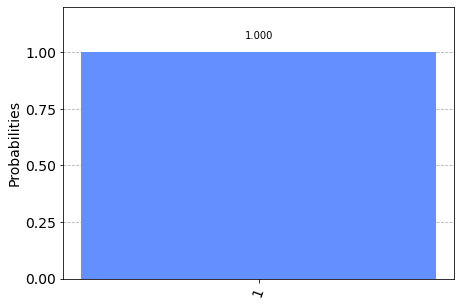

In [20]:
#------------------------------------------------------------------------
#  USING AN HISTORIGRAM FOR QISKIT
#------------------------------------------------------------------------
    # we can show the result by using histogram as follows
from qiskit.visualization import plot_histogram
plot_histogram(counts)

# Lenguaje de máquina ... ¿para ordenadores cuánticos?
## Lenguaje de ensamblaje cuántico

En la ejecución anterior, usamos "qasm_simulator". Aquí "qasm" significa Open Quantum Assembly Language. Nuestro circuito se convierte a código qasm antes de ejecutarse en simuladores o computadoras cuánticas reales.

Wikipedia (26 de marzo de 2021): es una representación intermedia de instrucciones cuánticas. El lenguaje se describió por primera vez en un artículo publicado en julio de 2017, y se lanzó una implementación de código fuente de referencia como parte del kit de software de información cuántica de IBM (Qiskit) para su uso con su plataforma de computación cuántica en la nube IBM Q Experience. lenguajes de descripción de hardware tradicionales como Verilog.

In [21]:
#------------------------------------------------------------------------
#  PRINTING THE QASM CODE
#------------------------------------------------------------------------
#This code is like a down level language programming, but for quantum!
print(qc.qasm())

OPENQASM 2.0;
include "qelib1.inc";
qreg qreg[1];
creg creg[1];
x qreg[0];
measure qreg[0] -> creg[0];



 
# ¿Solo uno? ¡Agreguemos más de uno!
## Diseñando un circuito Qubit múltiple 
Podemos diseñar un nuevo circuito con más de un circuito, propongamos 3

Look at my circuit!


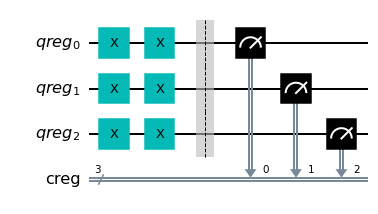

In [7]:
#------------------------------------------------------------------------
#  3 QUANTUM BITS CIRCUIT CODE
#------------------------------------------------------------------------

# import all objects and methods at once
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer
import matplotlib.pyplot as plt

# define quantum and classical registers and then quantum circuit
q2 = QuantumRegister(3,"qreg")
c2 = ClassicalRegister(3,"creg")
qc2 = QuantumCircuit(q2,c2)

#------------------------------------------------------------------------
#  APPLYING SOME OPERATORS
#------------------------------------------------------------------------

#Apply X-Gate to the three Qbits
qc2.x(q2[0])
qc2.x(q2[1])
qc2.x(q2[2])

#Apply X-Gate to the first Qbit 1 time
qc2.x(q2[0])


#Apply X-Gate to the second Qbit 1 time
qc2.x(q2[1])


#Apply X-Gate to the third Qbits 1 time
qc2.x(q2[2])

#------------------------------------------------------------------------
#  GETTING AN UPGRADE FOR OUR CIRCUIT
#------------------------------------------------------------------------

# define a barrier (for a better visualization)
qc2.barrier()

#------------------------------------------------------------------------
#  SHOWING THE CIRCUIT
#------------------------------------------------------------------------

# if the sizes of quantum and classical registers are the same, we can define measurements with a single line of code
qc2.measure(q2,c2)
# then quantum bits and classical bits are associated with respect to their indices

# run the codes until now, and then draw our circuit
print("Look at my circuit!")

qc2.draw('mpl')
# re-execute this cell if the circuit diagram does not appear

Como puede ver, el orden de las puertas aplicadas no se ve afectado por el tiempo. por lo que podemos apilar las puertas aplicadas a nuestro circuito solo cuidando por orden y medición. También puede ver que el orden de los bits cuánticos es de arriba a abajo: qreg [0], qreg [1], qreg [2].

Pero, si te gusta, podemos revertirlo.

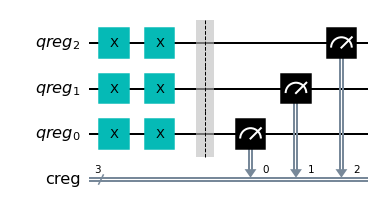

In [24]:
#------------------------------------------------------------------------
#  REVERSING BITS METHOD 
#------------------------------------------------------------------------
#        mycircuit.draw(output,reverse_bits=True or False) by default reverse_bits = False
qc2.draw('mpl',reverse_bits=True)
# re-execute this cell if the circuit diagram does not appear

# Tarea y ejercicios
Vamos a ponernos en forma en qiskit haciendo algunos ejercicios interesantes a continuación.

## Tarea 1

Como queremos aplicar lo aprendido aquí, vamos a adivinar el resultado del circuito.

Ponga este código en ejecución y compare lo que adivina y el circuito.

In [34]:
job = execute(qc2,Aer.get_backend('qasm_simulator'),shots=100)
counts = job.result().get_counts(qc2)
print(counts)

{'000': 100}


## Pero, ¿qué significan estos números?

Mientras estemos hablando de programación y lenguaje máquina, podemos interpretar la medida leyendo el orden de los Qbits:

                                 qreg [2], qreg [1], qreg [0].
                                
Por un sistema o circuito de "X" número de Qbits es el mismo orden y lectura. Que recuerda un número binario, solo formado por Qbits y medido por registros clásicos.

Esto significa que el primer byte es el bit menos significativo (LSB) y el último byte es el bit más significativo (MSB), por ejemplo, el número: 101, el primer "1" tenía un valor de 1 pero el último "1" tenía un valor de 4, coinciden juntos es igual al número 5 en nuestra lectura normal.

En otras palabras, hablamos de un sistema en el que cada posición es múltiplo de 2:

Por ejemplo, $$15$$ = $$1.$$ $$ 2 ^ 2 $$ + $$1.$$$$ 2 ^ 2 $$ + $$1.$$$$ 2 ^ 2$$ + $$1.$$$$2 ^ 2$$ = $$ 1111 $$

o para un registro clásico = creg [3] = 1, creg [2] = 1, creg [1] = 1 y creg [0] = 1.

## Tarea 2

¿Estás un poco cansado de crear un sistema numérico cuántico definido? ¡Tengo la solución!

hagamos un algoritmo aleatorio para Python, que cumpla con las siguientes condiciones:

     * Generar números aleatorios entre 2 y 20
     * Imprime una lista de números aleatorios

In [ ]:
#Write your solution here!

## Tarea 3

Implemente su última solución de código en un nuevo circuito cuántico que genera una salida aleatoria para números aleatorios de Qbits.
* RECUERDA:
     + Los bits cuánticos y los bits clásicos deben coincidir
     + Podemos implementar un solo circuito Qbit
     + Trace la salida usando mpl
     + Se deben implementar al menos 3 puertas
     + Cada implementación de puerta debe usar un separador
    

In [ ]:
#Write your solution here!